# Лабораторная работа №3
#### Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

- Импорт необходимых библиотек, создание DataFraim'a

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/WineQT.csv')

#### Анализ датасета

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


- Датасет имеет 12 колонок и 1143 строк

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lab2.utils import get_df_info
        
get_df_info(df)


Столбец fixed acidity (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 0)

Столбец volatile acidity (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 1)

Столбец citric acid (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 2)

Столбец residual sugar (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 3)

Столбец chlorides (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 4)

Столбец free sulfur dioxide (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 5)

Столбец total sulfur dioxide (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 6)

Столбец density (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 7)

Столбец pH (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 8)

Столбец sulphates (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 9)

Столбец alcohol (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 10)

Столбец quality (тип int64) имеет 0

- Во всех столбцах нет пропусков

<AxesSubplot:>

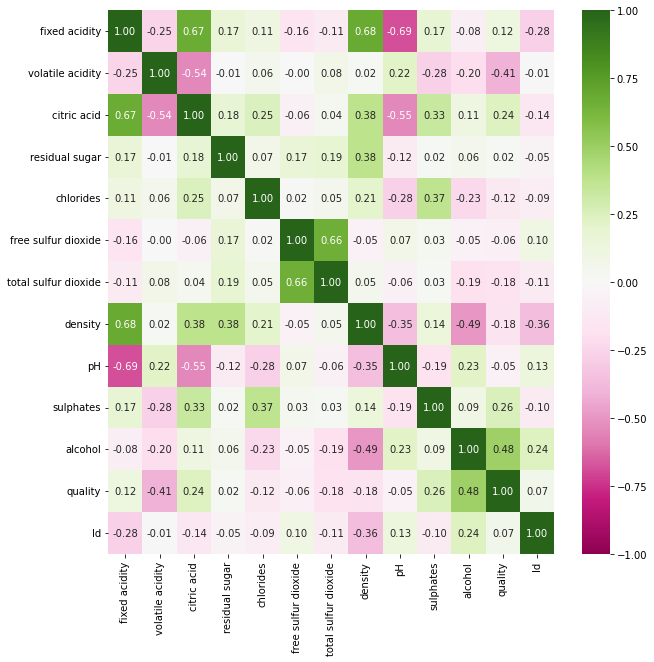

In [6]:
fig, ax = plt.subplots(1, 1, sharex="col", sharey="row", figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="PiYG", fmt=".2f", vmin=-1, vmax=1)


> Выберем параметры "quality" и "fixed acidity" как целевые

- Произведём отбор доп. параметров

In [7]:
nparray = df.to_numpy()

taken_cols = [0, 1, 2, 7, 8, 9, 10, 11]
taken_cols_cl = [1, 2, 9, 10, 11]

In [8]:
nparray_sliced = nparray.take(taken_cols, 1)

nparray_cl = nparray.take(taken_cols_cl, 1)

df_sliced = pd.DataFrame(nparray_sliced, columns=df.columns.take(taken_cols))
df_cl = pd.DataFrame(nparray_cl, columns=df.columns.take(taken_cols_cl))

df_sliced.head()


,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,0.9978,3.51,0.56,9.4,5.0


In [9]:
df_sliced.describe()

,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

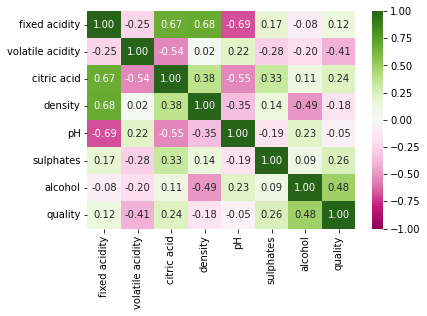

In [10]:
sns.heatmap(df_sliced.corr(), annot=True, cmap="PiYG", fmt=".2f", vmin=-1, vmax=1)

In [11]:
get_df_info(df_sliced)


Столбец fixed acidity (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 0)

Столбец volatile acidity (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 1)

Столбец citric acid (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 2)

Столбец density (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 3)

Столбец pH (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 4)

Столбец sulphates (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 5)

Столбец alcohol (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 6)

Столбец quality (тип float64) имеет 0 пропусков из 1143 значений, 0.0% (индекс 7)


In [12]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

# данные для регрессии
df_sliced_scaled = df_sliced.copy()

# данные для классификации
df_scaled_cl = df_cl.copy()

columns_for_scaling = df_sliced.columns

for i in columns_for_scaling:
    df_sliced_scaled[[i]] = sc.fit_transform(df_sliced[[i]])

for i in df_cl.columns:
    if i != 'quality':
      df_scaled_cl[[i]] = sc.fit_transform(df_cl[[i]])


df_sliced_scaled.describe()


,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.328417,0.281739,0.268364,0.489017,0.449618,0.196232,0.314171,0.531409
std,0.154654,0.123036,0.196686,0.141341,0.123358,0.102035,0.166492,0.161165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.186644,0.090000,0.403818,0.366142,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.250000,0.485316,0.448819,0.173653,0.276923,0.600000
75%,0.398230,0.356164,0.420000,0.570852,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

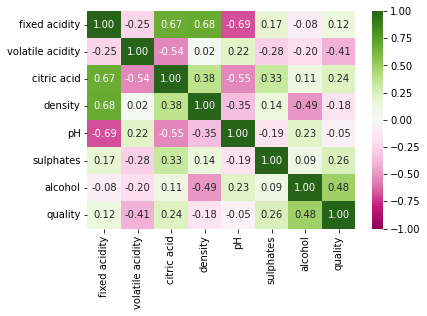

In [13]:
sns.heatmap(df_sliced_scaled.corr(), annot=True, cmap="PiYG", fmt=".2f", vmin=-1, vmax=1)


#### Метод kNN

In [14]:
data_unscaled = df_sliced
data_scaled = df_sliced_scaled

<AxesSubplot:ylabel='Density'>

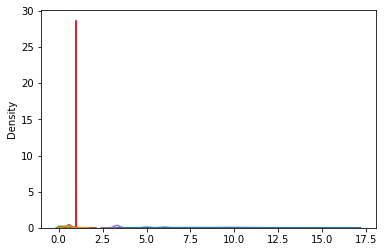

In [15]:
sns.kdeplot(data = data_unscaled, legend = False)

<AxesSubplot:ylabel='Density'>

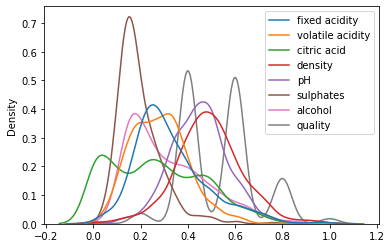

In [16]:
sns.kdeplot(data = data_scaled)

#### Регрессия

In [17]:
from sklearn.model_selection import train_test_split


# Для определённости будем всегда подставлять в random_state одно значение
RANDOM_STATE_GLOBAL = 1
# Указываем, где целевой признак, а где - набор данных

y_column = "fixed acidity"
# y_column = "quality"
x_columns = data_unscaled.columns.tolist()
x_columns.pop(x_columns.index(y_column))


data_unscaled_x_train, data_unscaled_x_test, data_unscaled_y_train, data_unscaled_y_test = train_test_split(data_unscaled[x_columns], 
                                                                                                            data_unscaled[y_column], 
                                                                                                            test_size = 0.2, 
                                                                                                            random_state = RANDOM_STATE_GLOBAL)

data_scaled_x_train, data_scaled_x_test, data_scaled_y_train, data_scaled_y_test = train_test_split(data_scaled[x_columns], 
                                                                                                            data_scaled[y_column], 
                                                                                                            test_size = 0.2, 
                                                                                                            random_state = RANDOM_STATE_GLOBAL)

##### Получение произвольной модели

In [18]:
from sklearn.neighbors import KNeighborsRegressor


random_param = 15

knn_unscaled = KNeighborsRegressor(n_neighbors = random_param)
knn_scaled = KNeighborsRegressor(n_neighbors = random_param)

knn_unscaled.fit(data_unscaled_x_train, data_unscaled_y_train)
knn_scaled.fit(data_scaled_x_train, data_scaled_y_train)

knn_unscaled_prediction = knn_unscaled.predict(data_unscaled_x_test)
knn_scaled_prediction = knn_scaled.predict(data_scaled_x_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit, cross_val_score, cross_validate


def print_regression_metrics(y_test, y_predicted):
    abs_err = mean_absolute_error(y_test, y_predicted)
    med_abs_err = median_absolute_error(y_test, y_predicted)
    mean_sq_err = mean_squared_error(y_test, y_predicted, squared=False)
    r2 = r2_score(y_test, y_predicted)

    return f"-Средняя абсолютная ошибка = {abs_err};\
          \n-Медианная абсолютная ошибка = {med_abs_err};\
          \n-Среднеквадратичная ошибка = {mean_sq_err};\
          \n-Коэффициент детерминации = {r2}."


In [20]:
unscaled_results = print_regression_metrics(data_unscaled_y_test, knn_unscaled_prediction)
print("Для немасштабированных данных:\n" + unscaled_results)

Для немасштабированных данных:
-Средняя абсолютная ошибка = 0.9337117903930132;          
-Медианная абсолютная ошибка = 0.6733333333333347;          
-Среднеквадратичная ошибка = 1.3030409698256435;          
-Коэффициент детерминации = 0.48034335910257353.


In [21]:
scaled_results = print_regression_metrics(data_scaled_y_test, knn_scaled_prediction)
print("Для масштабированных данных:\n" + scaled_results)

Для масштабированных данных:
-Средняя абсолютная ошибка = 0.051172856204351365;          
-Медианная абсолютная ошибка = 0.040117994100294985;          
-Среднеквадратичная ошибка = 0.06825895007051318;          
-Коэффициент детерминации = 0.8179140507244748.


In [22]:
def print_dictionary(dict):
    for k, v in dict.items():
        print(f"\n{k} -> {v}")

In [23]:
scoring_strategies = ["neg_root_mean_squared_error", "r2"] 

# Кросс-валидация по стратегии ShuffleSplit
data_unscaled_cv_scores = cross_validate(KNeighborsRegressor(n_neighbors = random_param), data_unscaled[x_columns], data_unscaled[y_column], scoring = scoring_strategies, cv = ShuffleSplit(n_splits = 8, test_size = 0.8, random_state = RANDOM_STATE_GLOBAL))
data_scaled_cv_scores = cross_validate(KNeighborsRegressor(n_neighbors = random_param), data_scaled[x_columns], data_scaled[y_column], scoring = scoring_strategies, cv = ShuffleSplit(n_splits = 8, test_size = 0.8, random_state = RANDOM_STATE_GLOBAL))

print("Кросс-валидация для немасштабированных данных:")
print_dictionary(data_unscaled_cv_scores)

print("\n\nКросс-валидация для масштабированных данных:")
print_dictionary(data_scaled_cv_scores)

Кросс-валидация для немасштабированных данных:

fit_time -> [0.0017159  0.00124884 0.00118494 0.00121403 0.0011611  0.0011189
 0.00119114 0.00114894]

score_time -> [0.00501513 0.0045681  0.00432324 0.00438309 0.00410485 0.00427008
 0.00557685 0.00444508]

test_neg_root_mean_squared_error -> [-1.39626202 -1.44587844 -1.51642493 -1.45415924 -1.50586796 -1.49622013
 -1.52830483 -1.53428592]

test_r2 -> [0.32751969 0.28905716 0.25992897 0.28830724 0.26166938 0.26767021
 0.26171954 0.24662078]


Кросс-валидация для масштабированных данных:

fit_time -> [0.00538015 0.00123692 0.00229192 0.00117826 0.00129008 0.00131726
 0.00119901 0.00118589]

score_time -> [0.00632381 0.00658107 0.00545812 0.00599289 0.00599074 0.00604892
 0.00583196 0.005759  ]

test_neg_root_mean_squared_error -> [-0.07748939 -0.07989178 -0.08442376 -0.07777424 -0.08516609 -0.08251339
 -0.08758429 -0.08454686]

test_r2 -> [0.73552351 0.72283898 0.70710107 0.74004567 0.69844439 0.71560533
 0.69039303 0.70788568]


##### Получение оптимальной модели

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

tested_parametres = {"n_neighbors" : np.array(range(1, 41, 1))}

In [25]:
%%time
# Кросс-валидация по стратегии KFold
randomized_grid_search = RandomizedSearchCV(KNeighborsRegressor(), 
                                            tested_parametres, 
                                            n_iter = 40, 
                                            random_state = RANDOM_STATE_GLOBAL, 
                                            cv = KFold(shuffle = True, random_state = RANDOM_STATE_GLOBAL), 
                                            scoring = "neg_root_mean_squared_error")

randomized_grid_search.fit(data_unscaled[x_columns], data_unscaled[y_column])

CPU times: user 721 ms, sys: 4.43 ms, total: 725 ms
Wall time: 724 ms


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=KNeighborsRegressor(), n_iter=40,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])},
                   random_state=1, scoring='neg_root_mean_squared_error')

In [26]:
randomized_best_param = randomized_grid_search.best_params_.get("n_neighbors")
print(randomized_best_param, randomized_grid_search.best_score_)

7 -1.1681855323422545


In [27]:
# Ищем решение вокруг полученного значения с радиусом 10
# Тоже перебираю так много из-за проблем с масштабированными данными
gs_parametres = {"n_neighbors" : np.array(range(randomized_best_param - 3, randomized_best_param + 4))}

# Прогоняем все решения в окрестности
grid_search = GridSearchCV(KNeighborsRegressor(), gs_parametres, scoring = "neg_root_mean_squared_error", cv = KFold(shuffle = True, random_state = RANDOM_STATE_GLOBAL))
# Обучаем оптимальную модель
grid_search.fit(data_unscaled[x_columns], data_unscaled[y_column])

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10])},
             scoring='neg_root_mean_squared_error')

In [28]:
# Итоговые "наилучшие" параметр и показатель RMSE:
best_param = grid_search.best_params_.get("n_neighbors")
print(best_param, grid_search.best_score_)

7 -1.1681855323422545


In [29]:
# Обучаем оптимальную модель
cv_found_knn_unscaled = KNeighborsRegressor(n_neighbors = best_param)
cv_found_knn_unscaled.fit(data_unscaled_x_train, data_unscaled_y_train)
cv_found_knn_unscaled_prediction = cv_found_knn_unscaled.predict(data_unscaled_x_test)

cv_unscaled_results = print_regression_metrics(data_unscaled_y_test, cv_found_knn_unscaled_prediction)

In [30]:
def print_results(random, optimum):
    print("Немасштабированные данные\n")
    print("Случайная модель:\n" + random)
    print('------------------------------------------')
    print("Оптимальная модель:\n" + optimum)

In [31]:
print_results(unscaled_results, cv_unscaled_results)

Немасштабированные данные

Случайная модель:
-Средняя абсолютная ошибка = 0.9337117903930132;          
-Медианная абсолютная ошибка = 0.6733333333333347;          
-Среднеквадратичная ошибка = 1.3030409698256435;          
-Коэффициент детерминации = 0.48034335910257353.
------------------------------------------
Оптимальная модель:
-Средняя абсолютная ошибка = 0.8537741734248284;          
-Медианная абсолютная ошибка = 0.5857142857142845;          
-Среднеквадратичная ошибка = 1.2386117898073419;          
-Коэффициент детерминации = 0.5304619856518069.


In [32]:
# Точно также прогоняем: тот же диапазон возможных значений K, тот же ключ генератора случ. чисел, 
#                        та же стратегия кросс-валидации, та же метрика.
randomized_grid_search = RandomizedSearchCV(KNeighborsRegressor(), 
                                            tested_parametres, 
                                            n_iter = 40, 
                                            random_state = RANDOM_STATE_GLOBAL, 
                                            cv = KFold(shuffle = True, random_state = RANDOM_STATE_GLOBAL), 
                                            scoring = "neg_root_mean_squared_error")
# Теперь работаем с масштабированными данными
randomized_grid_search.fit(data_scaled[x_columns], data_scaled[y_column])

# Найденное рабочее значение
randomized_best_param = randomized_grid_search.best_params_.get("n_neighbors")
print(randomized_best_param, randomized_grid_search.best_score_)

# Ищем оптимальное значение гиперпараметра
gs_parametres = {"n_neighbors" : np.array(range(randomized_best_param - 3, randomized_best_param + 4))}
grid_search = GridSearchCV(KNeighborsRegressor(), gs_parametres, scoring = "neg_root_mean_squared_error", cv = KFold(shuffle = True, random_state = RANDOM_STATE_GLOBAL))
grid_search.fit(data_scaled[x_columns], data_scaled[y_column])

# Найденное оптимальное значение
best_param = grid_search.best_params_.get("n_neighbors")
print(best_param, grid_search.best_score_)

# Обучаем оптимальную модель
cv_found_knn_scaled = KNeighborsRegressor(n_neighbors = best_param)
cv_found_knn_scaled.fit(data_scaled_x_train, data_scaled_y_train)
cv_found_knn_scaled_prediction = cv_found_knn_scaled.predict(data_scaled_x_test)

cv_scaled_results = print_regression_metrics(data_scaled_y_test, cv_found_knn_scaled_prediction)

5 -0.06991970951644243
5 -0.06991970951644243


In [33]:
print_results(scaled_results, cv_scaled_results)

Немасштабированные данные

Случайная модель:
-Средняя абсолютная ошибка = 0.051172856204351365;          
-Медианная абсолютная ошибка = 0.040117994100294985;          
-Среднеквадратичная ошибка = 0.06825895007051318;          
-Коэффициент детерминации = 0.8179140507244748.
------------------------------------------
Оптимальная модель:
-Средняя абсолютная ошибка = 0.048019476755419885;          
-Медианная абсолютная ошибка = 0.033628318584070865;          
-Среднеквадратичная ошибка = 0.06460724870773447;          
-Коэффициент детерминации = 0.8368753018768951.


> Как видно, подбор гиперпараметра K поспособствовал улучшению качества модели как для масштабированных данных, так для немасштабированных

#### Классификация

- Воспользуемся методом kNN также для решения задачи классификации для параметра "quality" 

In [34]:
# Для определённости будем всегда подставлять в random_state одно значение
RANDOM_STATE_GLOBAL = 1
# Указываем, где целевой признак, а где - набор данных

data_scaled = df_scaled_cl.copy()
data_unscaled = df_cl.copy()
y_column = "quality"
x_columns = data_unscaled.columns.tolist()
x_columns.pop(x_columns.index(y_column))


data_unscaled_x_train, data_unscaled_x_test, data_unscaled_y_train, data_unscaled_y_test = train_test_split(data_unscaled[x_columns], 
                                                                                                            data_unscaled[y_column], 
                                                                                                            test_size = 0.2, 
                                                                                                            random_state = RANDOM_STATE_GLOBAL)

data_scaled_x_train, data_scaled_x_test, data_scaled_y_train, data_scaled_y_test = train_test_split(data_scaled[x_columns], 
                                                                                                            data_scaled[y_column], 
                                                                                                            test_size = 0.2, 
                                                                                                            random_state = RANDOM_STATE_GLOBAL)

##### Получение произвольной модели

In [35]:
from sklearn.neighbors import KNeighborsClassifier


random_param = 15

knn_unscaled = KNeighborsClassifier(n_neighbors = random_param)
knn_scaled = KNeighborsClassifier(n_neighbors = random_param)

knn_unscaled.fit(data_unscaled_x_train, data_unscaled_y_train)
knn_scaled.fit(data_scaled_x_train, data_scaled_y_train)

knn_unscaled_prediction = knn_unscaled.predict(data_unscaled_x_test)
knn_scaled_prediction = knn_scaled.predict(data_scaled_x_test)

- Создадим метод, для вывода методов оценки модели

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def print_classification_metrics(y_test, y_predicted):
    acc_score = accuracy_score(y_test, y_predicted)
    prec_score = precision_score(y_test, y_predicted, average='weighted')
    rec_score = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')

    return f"-Accuracy = {acc_score};\
          \n-Precision= {prec_score};\
          \n-Recall = {rec_score};\
          \n-f1 = {f1}."


In [37]:
unscaled_results = print_classification_metrics(data_unscaled_y_test, knn_unscaled_prediction)
print("Для немасштабированных данных:\n" + unscaled_results)

Для немасштабированных данных:
-Accuracy = 0.5807860262008734;          
-Precision= 0.5412787344483809;          
-Recall = 0.5807860262008734;          
-f1 = 0.5579432160980076.


/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
scaled_results = print_classification_metrics(data_scaled_y_test, knn_scaled_prediction)
print("Для масштабированных данных:\n" + scaled_results)

Для масштабированных данных:
-Accuracy = 0.5895196506550219;          
-Precision= 0.5693327204474067;          
-Recall = 0.5895196506550219;          
-f1 = 0.5735453609940674.


/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Точность классификации получилась не очень высокой

##### Получение оптимальной модели

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

tested_parametres = {"n_neighbors" : np.array(range(1, 51, 1))}

In [40]:
%%time
# Кросс-валидация по стратегии KFold
randomized_grid_search = RandomizedSearchCV(KNeighborsClassifier(), 
                                            tested_parametres, 
                                            n_iter = 50, 
                                            random_state = RANDOM_STATE_GLOBAL, 
                                            cv = KFold(shuffle = True, random_state = RANDOM_STATE_GLOBAL), 
                                            scoring = "balanced_accuracy")

randomized_grid_search.fit(data_unscaled[x_columns], data_unscaled[y_column])

/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


CPU times: user 1.66 s, sys: 9.21 ms, total: 1.67 s
Wall time: 1.67 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
                   random_state=1, scoring='balanced_accuracy')

In [41]:
randomized_best_param = randomized_grid_search.best_params_.get("n_neighbors")
print(randomized_best_param, randomized_grid_search.best_score_)

1 0.38085391319132766


In [42]:
gs_parametres = {"n_neighbors": np.array(
    range(randomized_best_param - 3, randomized_best_param + 4))}

grid_search = GridSearchCV(KNeighborsClassifier(), gs_parametres, scoring='balanced_accuracy', cv=KFold(
    shuffle=True, random_state=RANDOM_STATE_GLOBAL))

grid_search.fit(data_unscaled[x_columns], data_unscaled[y_column])


/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 35.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them b

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([-2, -1,  0,  1,  2,  3,  4])},
             scoring='balanced_accuracy')

In [43]:
# Итоговые "наилучшие" параметр и показатель RMSE:
best_param = grid_search.best_params_.get("n_neighbors")
print(best_param, grid_search.best_score_)

1 0.38085391319132766


In [44]:
cv_found_knn_unscaled = KNeighborsClassifier(n_neighbors = best_param)
cv_found_knn_unscaled.fit(data_unscaled_x_train, data_unscaled_y_train)
cv_found_knn_unscaled_prediction = cv_found_knn_unscaled.predict(data_unscaled_x_test)

cv_unscaled_results = print_classification_metrics(data_unscaled_y_test, cv_found_knn_unscaled_prediction)

/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print_results(unscaled_results, cv_unscaled_results)

Немасштабированные данные

Случайная модель:
-Accuracy = 0.5807860262008734;          
-Precision= 0.5412787344483809;          
-Recall = 0.5807860262008734;          
-f1 = 0.5579432160980076.
------------------------------------------
Оптимальная модель:
-Accuracy = 0.62882096069869;          
-Precision= 0.627083626801897;          
-Recall = 0.62882096069869;          
-f1 = 0.6253016146073963.


In [46]:
randomized_grid_search = RandomizedSearchCV(KNeighborsClassifier(),
                                            tested_parametres,
                                            n_iter=50,
                                            random_state=RANDOM_STATE_GLOBAL,
                                            cv=KFold(
                                                shuffle=True, random_state=RANDOM_STATE_GLOBAL),
                                            scoring='balanced_accuracy')

randomized_grid_search.fit(data_scaled[x_columns], data_scaled[y_column])

randomized_best_param = randomized_grid_search.best_params_.get("n_neighbors")
print(randomized_best_param, randomized_grid_search.best_score_)

gs_parametres = {"n_neighbors": np.array(
    range(randomized_best_param - 3, randomized_best_param + 4))}
grid_search = GridSearchCV(KNeighborsClassifier(), gs_parametres, scoring='balanced_accuracy', cv=KFold(
    shuffle=True, random_state=RANDOM_STATE_GLOBAL))
grid_search.fit(data_scaled[x_columns], data_scaled[y_column])

best_param = grid_search.best_params_.get("n_neighbors")
print(best_param, grid_search.best_score_)

cv_found_knn_scaled = KNeighborsClassifier(n_neighbors=best_param)
cv_found_knn_scaled.fit(data_scaled_x_train, data_scaled_y_train)
cv_found_knn_scaled_prediction = cv_found_knn_scaled.predict(
    data_scaled_x_test)

cv_scaled_results = print_classification_metrics(
    data_scaled_y_test, cv_found_knn_scaled_prediction)


/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1 0.4107454755371836
1 0.4107454755371836


/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 35.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them b

In [47]:
print_results(scaled_results, cv_scaled_results)

Немасштабированные данные

Случайная модель:
-Accuracy = 0.5895196506550219;          
-Precision= 0.5693327204474067;          
-Recall = 0.5895196506550219;          
-f1 = 0.5735453609940674.
------------------------------------------
Оптимальная модель:
-Accuracy = 0.611353711790393;          
-Precision= 0.6290764417233151;          
-Recall = 0.611353711790393;          
-f1 = 0.6176357435350698.


<AxesSubplot:>

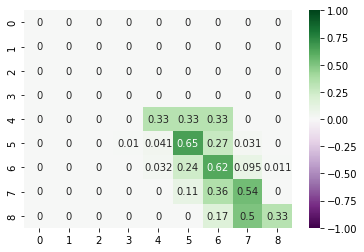

In [53]:
cm = confusion_matrix(data_scaled_y_test, cv_found_knn_scaled_prediction, labels=range(9), normalize="true")

sns.heatmap(cm, annot=True, cmap=plt.cm.PRGn, vmin=-1, vmax=1)


> С помощью подбора гиперпараметра удалось немного повысить качество модели